In [64]:
# Allow imports from parent directory - robust incase run twice 
import os, sys
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    sys.path.append(os.path.abspath(".")) 

# Import for this notebook 
from analysis import ReducedGMMPipeline
from analysis import XDPipeline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.table import Table
import pandas as pd
import numpy as np
import pickle

# Avoid warnings from umap for cleaner output
import warnings
warnings.filterwarnings("ignore")

# **Computational Cost Comparison**

- In this notebook we simply use the pipelines timing features to provide a comparison of the overall run times for the 12 dimensional GALAH analysis
- These pipelines have been presented in detail in the previous notebooks. 

---

## **System Specifications**
- To allow reproducibility to timing metrics presented below were calculated using the benchmark machine:

| Component      | Details              |
|----------------|----------------------|
| Model          | MacBook Pro 2020 |
| Chip           | Apple M1             |
| Memory         | 16 GB                |
| Operating System | macOS Sequoia 15.0.1 |


---

- A concious decision was made not to compare memory using Trace Malloc, this was due to the different ways in which the pipelines handle multiple initialisations
    - In XD these initialisations are handelled manually as the package does not support this and automatic comparison
    - In Low Dimension GMM this can be handelled and thus optimised by the package 
    - Overall: The results werent deemed comparable
    

In [53]:
# Assign True if you want timings to be manually rerun - high dimensional takes over 12 hours
rerun_GMM = False

In [5]:
# The data keys and their corrosponding error keys
galah_data_keys = ['fe_h', 'alpha_fe', 'Na_fe', 'Al_fe', 'Mn_fe', 'Y_fe', 'Ba_fe', 'Eu_fe', 'Mg_Cu', 'Mg_Mn', 'Ba_Eu', 'Energy']
galah_data_error_keys = ['e_fe_h', 'e_alpha_fe', 'e_Na_fe', 'e_Al_fe', 'e_Mn_fe', 'e_Y_fe', 'e_Ba_fe', 'e_Eu_fe', 'e_Mg_Cu', 'e_Mg_Mn', 'e_Ba_Eu', 'e_Energy']

## **Run Timings Comparison for High Dimensional (Original XD) Pipeline**
- If not rerun simply reload the saved results

In [6]:
# The path used to save or import the timings direction
save_path_highdim = 'XD_Results/Timings/Galah_12dim_highdim_timings.pkl'

if rerun_GMM:
    # Import the filtered data filtered in Notebook 0
    galah_data_filtered_path = 'data/filtered/Galah/Galah_data_filtered_1061.fits'

    # Open from file into astropy Table
    galah_processed_data = Table.read(galah_data_filtered_path, format='fits')

    # Initialise the pipeline
    galah_highdim_pipeline_timing = XDPipeline(galah_processed_data, galah_data_keys, galah_data_error_keys)

    # Run for 1 lot of 100 intialisations
    timing_highdim_dict = galah_highdim_pipeline_timing.run_XD(gauss_component_range=(1,10), max_iterations=int(1e9), n_repeats=1, n_init=100, timings=True)

    # Save timing dictionary
    with open(save_path_highdim, 'wb') as f:
        pickle.dump(timing_highdim_dict, f)

# If not rerunning, load the timings from file
else:
    with open(save_path_highdim, 'rb') as f:
        timing_highdim_dict = pickle.load(f)



Number of Gaussian Components:   0%|          | 0/10 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Repeat Cycles:   0%|          | 0/1 [00:00<?, ?it/s]

Initialisations:   0%|          | 0/100 [00:00<?, ?it/s]

Total run time: 16979.44 seconds


## **Run Timings Comparison for Low Dimensional (UMAP) Pipeline**
- If not rerun simply reload the saved results

In [ ]:
# The path used to save or import the timings direction
save_path_lowdim = 'XD_Results/Timings/Galah_12dim_lowdim_timings.pkl'

if rerun_GMM:
    # Import the filtered data (also the pipline expect the high dimensional assigned data)
    galah_assigned_data_path = 'XD_Results/Galah_postGMM/galah_GMM_scaled_Gauss5_results.fits'

    # Open from file into astropy Table
    galah_postXD = Table.read(galah_assigned_data_path, format='fits')

    # Initalise the pipeline
    galah_lowdim_pipeline_timing = ReducedGMMPipeline(galah_postXD, galah_data_keys, galah_data_error_keys, umap_dimensions = 2, umap_n_neighbors = 15, umap_min_dist = 0.0)

    # Run for 100 intialisations
    timing_lowdim_dict = galah_lowdim_pipeline_timing.run_GMM(gauss_component_range = (1, 10), n_init = 100, timings=True)


    # Save timing dictionary
    with open(save_path_lowdim, 'wb') as f:
        pickle.dump(timing_lowdim_dict, f)

# If not rerunning, load the timings from file
else:
    with open(save_path_lowdim, 'rb') as f:
        timing_lowdim_dict = pickle.load(f)


Total run time: 6.65 seconds


## Visualising Comparison
- Below we present a table comparing the run times for a single run for each of the model (ie each of the no. of gaussians)
- We also present the total runtime of the pipelines (ie total)

In [ ]:
# Construct the DataFrame for the timings display
df = pd.DataFrame({
    "No. Gaussian Components": list(timing_lowdim_dict.keys()),
    "Low-Dim Time per Fit (s)": list(timing_lowdim_dict.values()),
    "High-Dim Time per Fit (s)": list(timing_highdim_dict.values())
})

# Calculate the factor of speedup
df[["Low-Dim Time per Fit (s)", "High-Dim Time per Fit (s)"]] = df[["Low-Dim Time per Fit (s)", "High-Dim Time per Fit (s)"]].round(4)
df["Factor of Speedup"] = (df["High-Dim Time per Fit (s)"] / df["Low-Dim Time per Fit (s)"]).round(2)

# Compute total time of 100 initialisations across all components - ie running the pipeline for 100 initialisations
total_lowdim = df["Low-Dim Time per Fit (s)"].sum() * 100
total_highdim = df["High-Dim Time per Fit (s)"].sum() * 100
total_speedup = total_highdim / total_lowdim
df.loc[len(df.index)] = ["All Components (100 fits)", round(total_lowdim, 4), round(total_highdim, 4), round(total_speedup, 2)]

# Display
print(df.to_markdown(index=False))

| No. Gaussian Components   |   Low-Dim Time per Fit (s) |   High-Dim Time per Fit (s) |   Factor of Speedup |
|:--------------------------|---------------------------:|----------------------------:|--------------------:|
| 1                         |                     0.0021 |                      2.6341 |             1254.33 |
| 2                         |                     0.0031 |                      4.819  |             1554.52 |
| 3                         |                     0.0045 |                      8.1755 |             1816.78 |
| 4                         |                     0.0042 |                     11.0036 |             2619.9  |
| 5                         |                     0.0065 |                     16.8094 |             2586.06 |
| 6                         |                     0.0065 |                     18.0026 |             2769.63 |
| 7                         |                     0.0072 |                     20.2925 |             2818.4  |
|

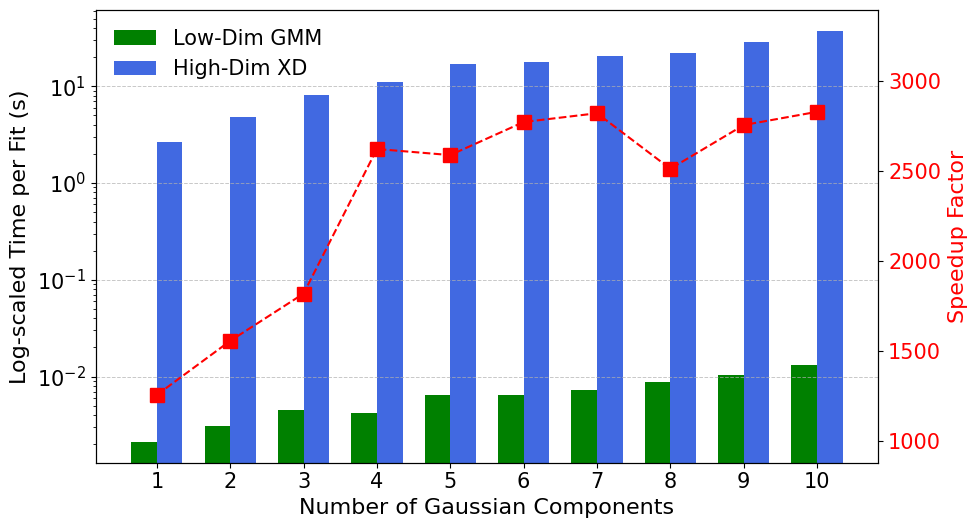

In [70]:
# --- Set fonts and figure parameters for publication ---
rcParams.update({
    "font.size": 14,
    "font.family": "sans-serif",
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 15,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15
})

# Extract data (excluding summary row)
components = df["No. Gaussian Components"][:-1]
lowdim_times = df["Low-Dim Time per Fit (s)"][:-1]
highdim_times = df["High-Dim Time per Fit (s)"][:-1]
speedup = df["Factor of Speedup"][:-1]

x = np.arange(len(components))  # component indices
width = 0.35  # width of each bar

fig, ax1 = plt.subplots(figsize=(10, 5.5))  # tighter layout for journals

# Bar plots
bars1 = ax1.bar(x - width/2, lowdim_times, width, label='Low-Dim GMM', color="green")
bars2 = ax1.bar(x + width/2, highdim_times, width, label='High-Dim XD', color="royalblue")

ax1.set_yscale('log')
ax1.set_xlabel("Number of Gaussian Components")
ax1.set_ylabel("Log-scaled Time per Fit (s)", labelpad=5)
ax1.set_xticks(x)
ax1.set_xticklabels(components)
ax1.legend(loc="upper left", frameon=False)
ax1.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Secondary axis: speedup
ax2 = ax1.twinx()
ax2.plot(x, speedup, color='red', linestyle='--', marker='s', markersize=10, label='Speedup Factor')
ax2.set_ylabel("Speedup Factor", color='red', labelpad=5)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(min(speedup) * 0.7, max(speedup) * 1.2)  # Adjust y-limits for speedup


# Layout and export-ready
fig.tight_layout()
plt.show()